# Case Study 2B
## Personalized Marketing

We are going to use the dataset from Case Study 2 and try to predict customer engagement and customer lifetime value.

Data Source:

https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [1]:
%load_ext autoreload
%autoreload 2

import helpers as hp

from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/' +
                 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df['Engaged'] = hp.binary_process(df, 'Response')
hp.get_ratio(df, 'Engaged')

0.14320122618786948

Recall that our overall engagement rate is about 14%.

Let's look at the engagement rate by (insurance) renewal offer type.

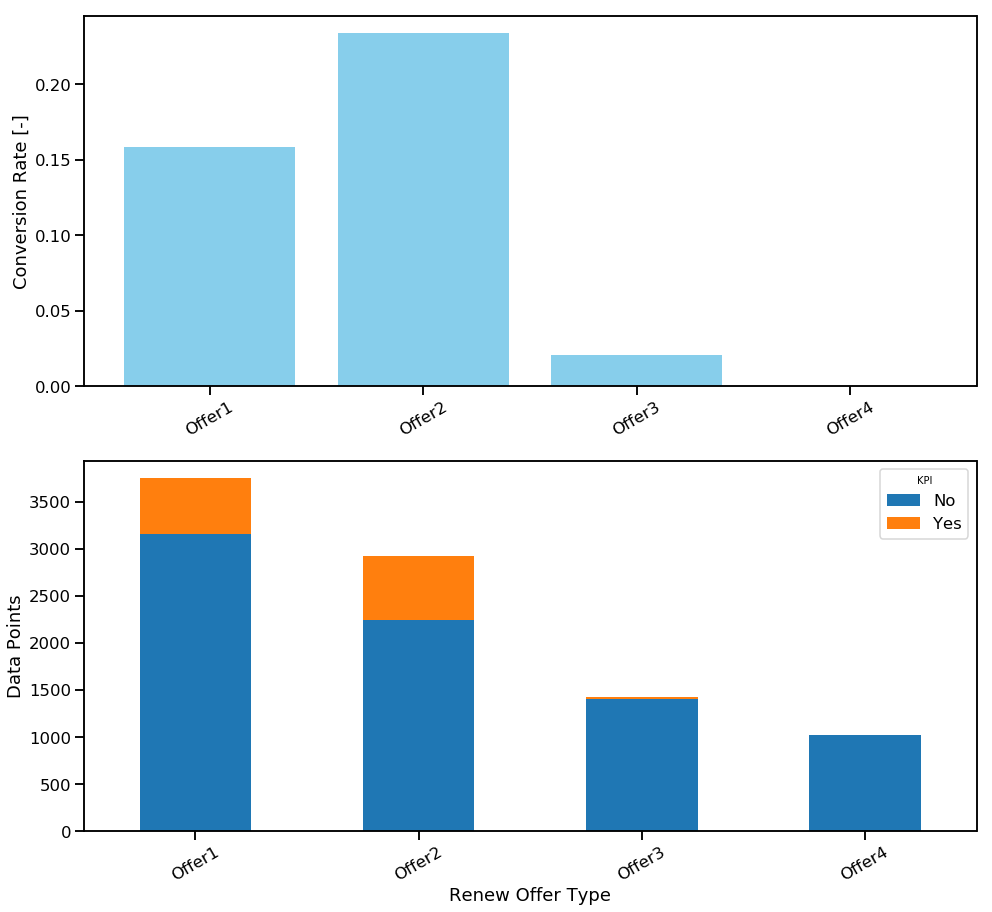

In [4]:
fig, ax = hp.bar_ratios_and_bins(df, 'Engaged', 'Renew Offer Type')

Offers 1 and 2 perform reasonably well while Offers 3 and 4 have almost no engagement!

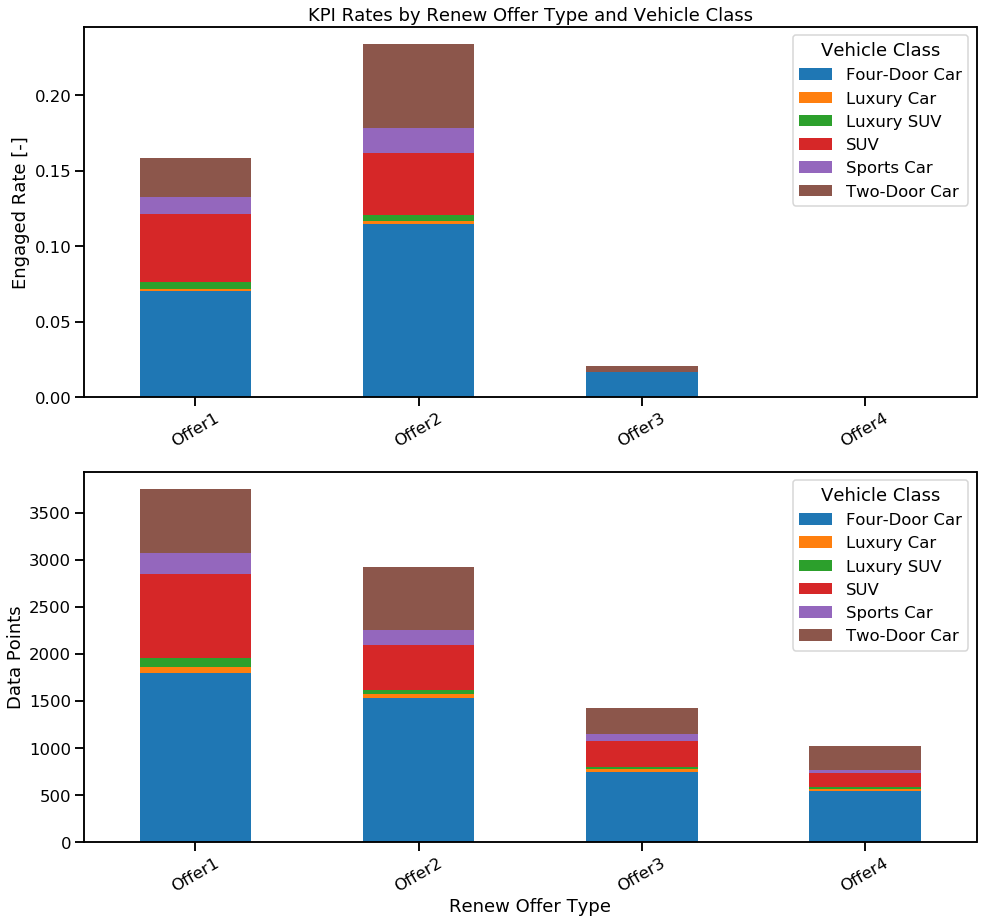

In [6]:
fig2, ax2 = hp.stacked_bar_ratios(
    df, 'Engaged', ['Renew Offer Type', 'Vehicle Class']
)

In [7]:
# TODO: Stacked bar side by side, each scaled to 100%

One thing we notice is that Offer 2 does relatively well with two-door cars, and we can observe this by seeing the relative amount of two-door cars in the sample versus the relative amount of engagement experienced.

In [8]:
# TODO: Plot engagement rate segmented into actual seg populations

Let's look at the engagement rate by sales channel and vehicle size.

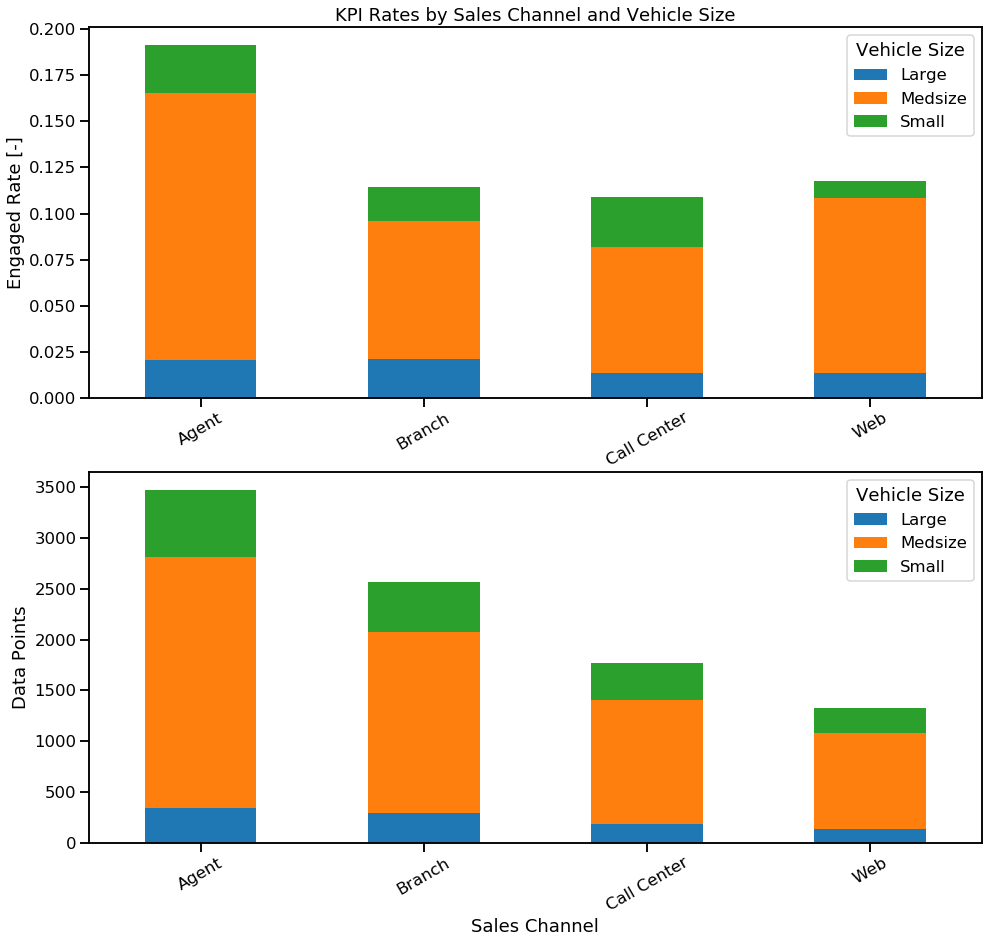

In [9]:
fig3, ax3 = hp.stacked_bar_ratios(
    df, 'Engaged', ['Sales Channel', 'Vehicle Size']
)

Now, let's bin some of the continuous features and segment them. We'll do this for Customer Lifetime Value and Months Since Policy Inception.

In [11]:
def bin_hilo(inpdf):
    df1 = inpdf.apply(lambda x: 'High'
                      if x > inpdf.median() else 'Low')
    return df1

df['CLV Segment'] = bin_hilo(df['Customer Lifetime Value'])
df['Policy Age Segment'] = bin_hilo(
    df['Months Since Policy Inception']
)

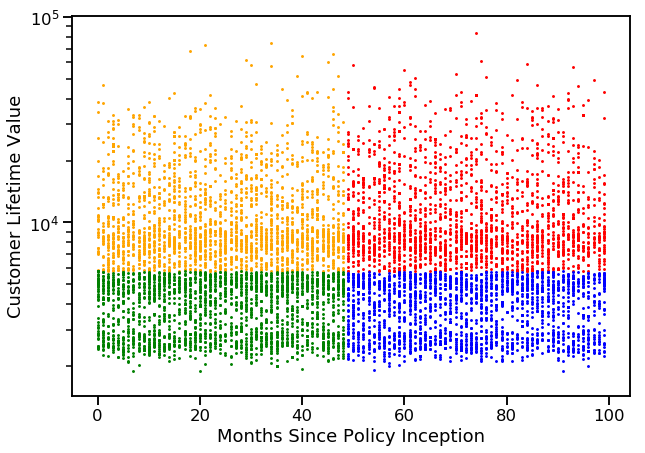

In [20]:
fig4, ax4 = hp.segment_scatter_2(
    df, 'Months Since Policy Inception', 'Customer Lifetime Value',
    'Policy Age Segment', 'CLV Segment'
)
ax4.set_yscale('log')

In [24]:
nn = hp.ratio_segmented(df, 'Engaged',
                        ['CLV Segment', 'Policy Age Segment'])
nn
nn.unstack()

Policy Age Segment,High,Low
CLV Segment,,
High,0.138728,0.132067
Low,0.162450,0.139957


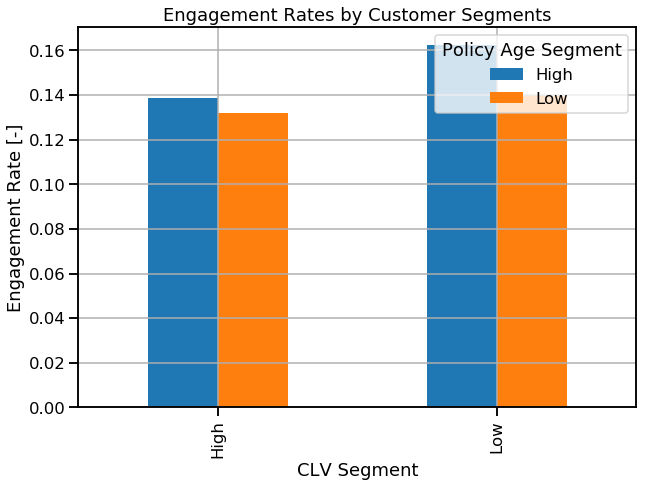

In [27]:
ax5 = nn.unstack().plot(
    kind='bar', figsize=(10, 7), grid=True
)
_ = ax5.set_ylabel('Engagement Rate [-]')
_ = ax5.set_title('Engagement Rates by Customer Segments')
